# **Dataset Analysis**

**Imports and Loading Dataset**

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv("../Datasets/Bank Customer Churn Prediction.csv")
df

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

**Encoding**

In [51]:
from sklearn.preprocessing import LabelEncoder

variables = ['gender']

encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

from sklearn.preprocessing import OneHotEncoder

variables = ['country']

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

df = df.drop("country_France", axis=1)
df = df.drop("customer_id", axis=1)
df.head()

credit_score  gender  age  tenure    balance  products_number  credit_card  \
0           619       0   42       2       0.00                1            1   
1           608       0   41       1   83807.86                1            0   
2           502       0   42       8  159660.80                3            1   
3           699       0   39       1       0.00                2            0   
4           850       0   43       2  125510.82                1            1   

   active_member  estimated_salary  churn  country_Germany  country_Spain  
0              1         101348.88      1                0              0  
1              1         112542.58      0                0              1  
2              0         113931.57      1                0              0  
3              0          93826.63      0                0              0  
4              1          79084.10      0                0              1

We dropped CUstomer ID as its not useful and encoded gender and countries to have only numerical data

**Dataset Balance**

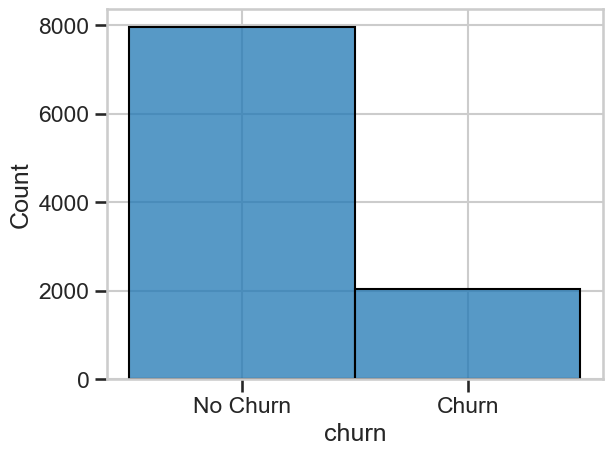

In [52]:
sns.histplot(x="churn", data=df, bins=[-0.5, 0.5, 1.5])
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

The database is heavily biased towards No churn which needs to be balanced

**Correlation Matrix**

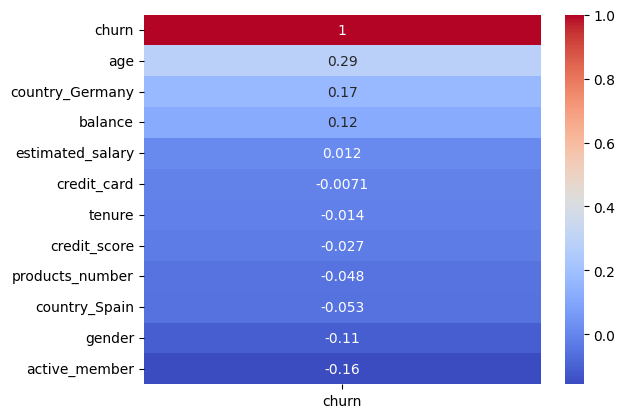

In [38]:
corr_matrix = df.corr()['churn'].sort_values(ascending=False)
sns.heatmap(corr_matrix.to_frame() , annot=True, cmap='coolwarm')
plt.show()

This shows us that Age , People from Germany, balance have a positive effect showing increase in those will result in more likeliness to churn and Active member status has a negative effect meaning a non active member is likely to churn

## NEW COMPARISON ## - age vs churn


<Figure size 2000x800 with 0 Axes>

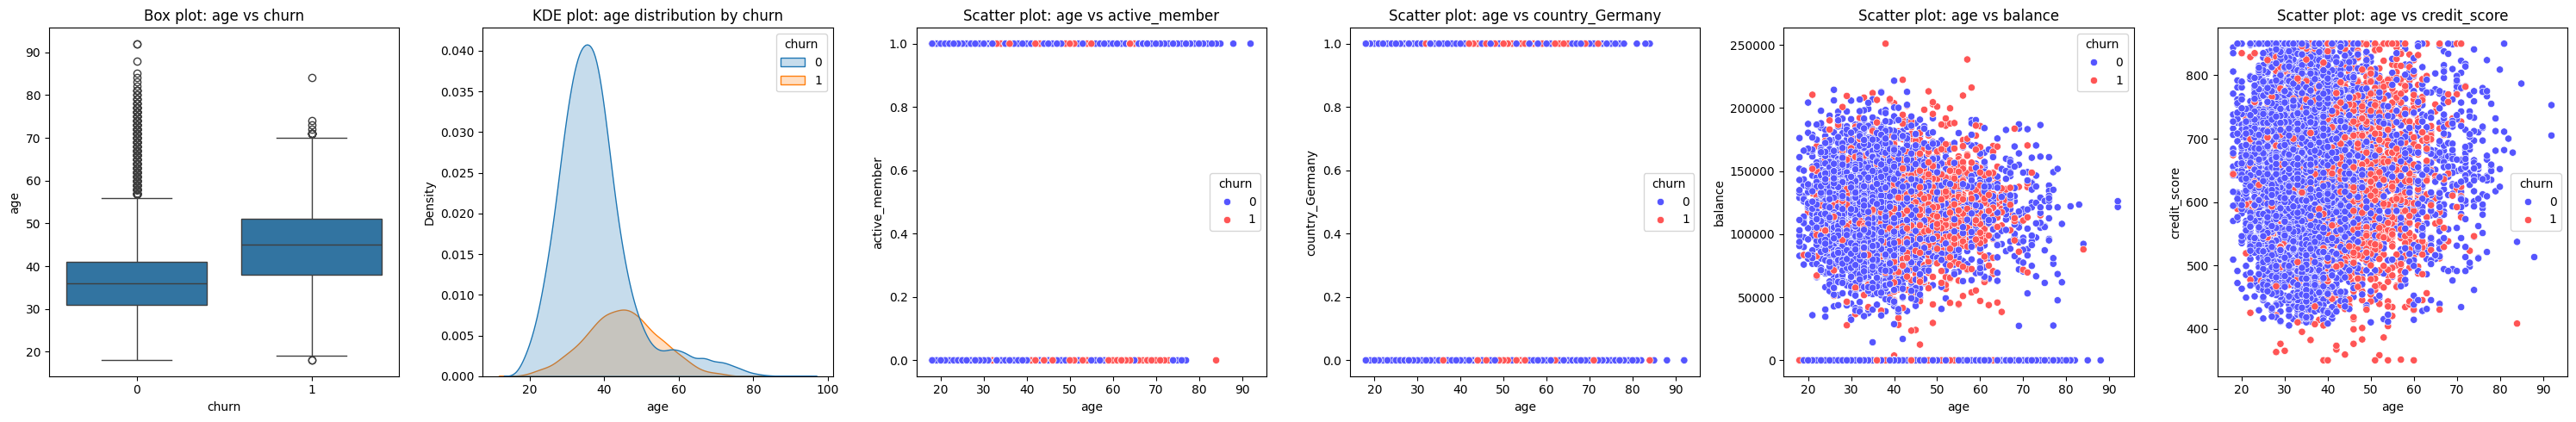

## NEW COMPARISON ## - active_member vs churn


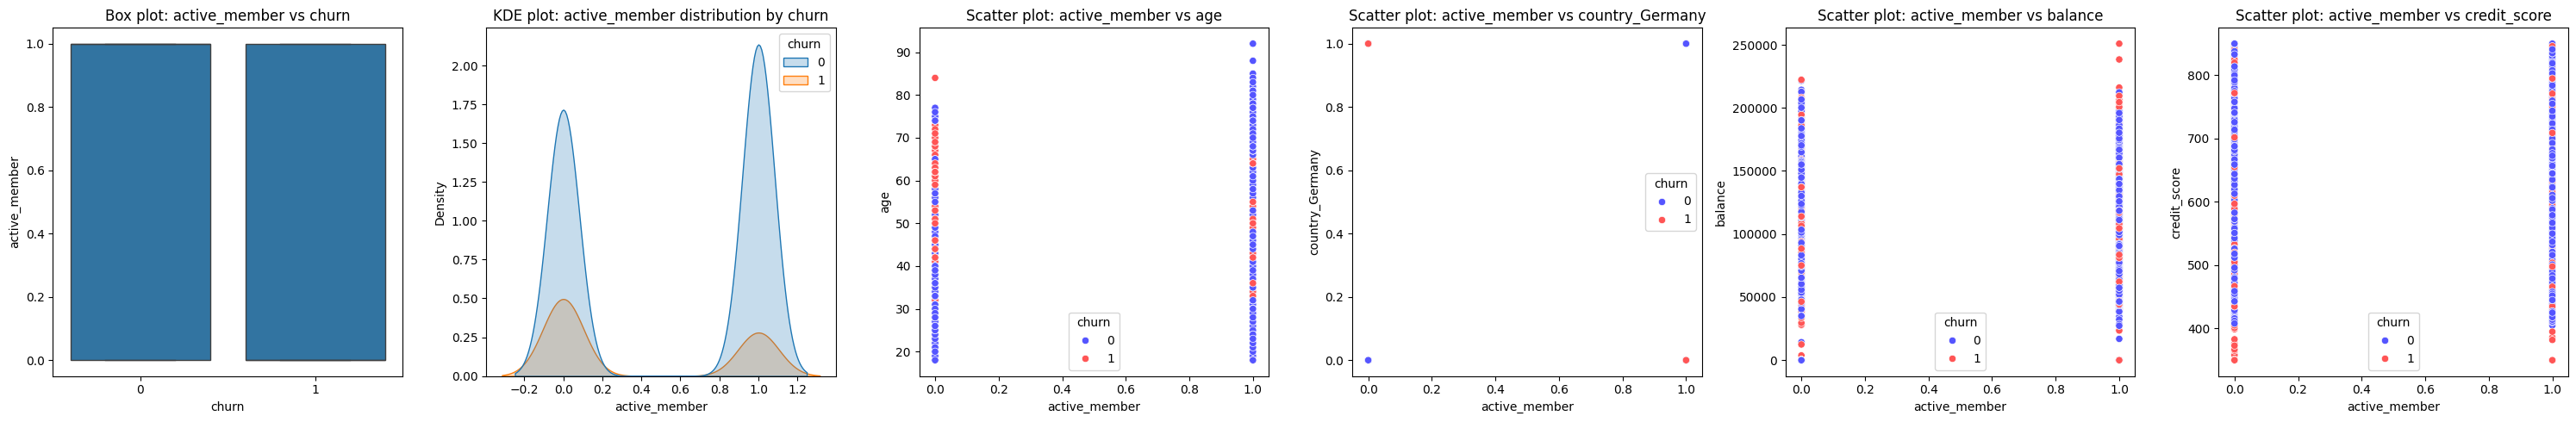

## NEW COMPARISON ## - country_Germany vs churn


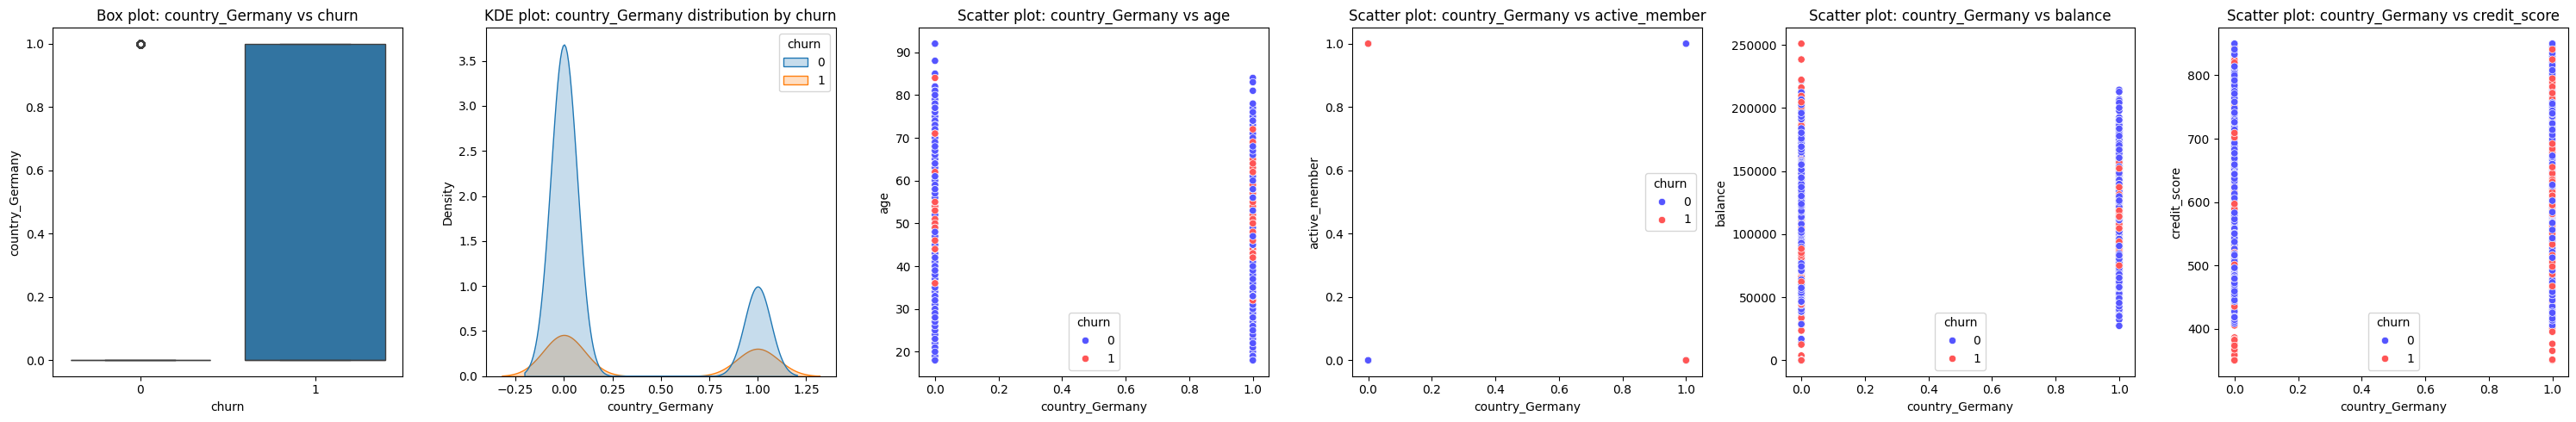

## NEW COMPARISON ## - balance vs churn


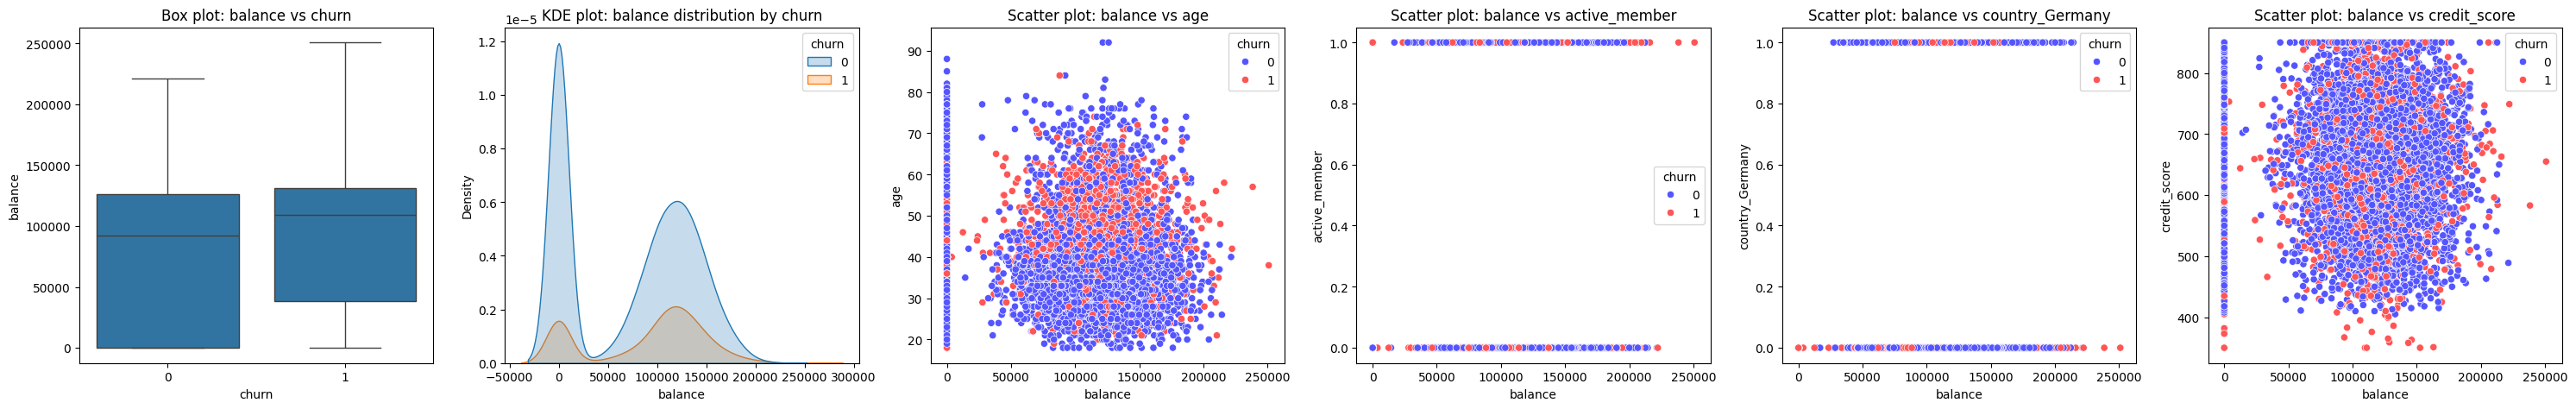

## NEW COMPARISON ## - credit_score vs churn


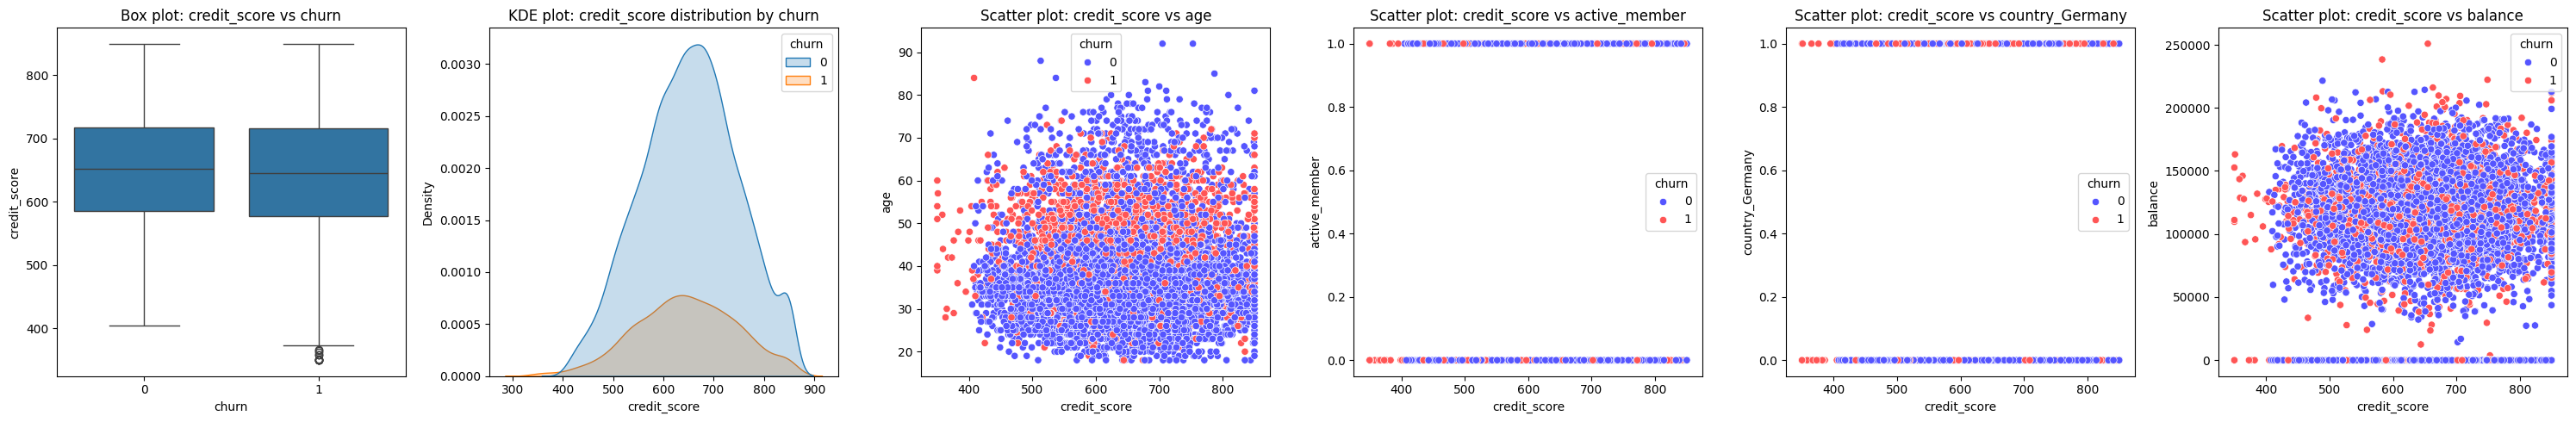

In [39]:
# CODE PARTIALLY GENERATED BY CHATGPT
# modified by instructor to have more features

# List of suspected columns for overlap
# USE SHAP, LIME, phik-matrix, correlation matrix etc to find columns that seems
# probable for having overlap, noise, redundancy, distribution problems and/or outlier problems
# try to keep the amount of variables to a small number at a time, so you don't slow down the
# process of plot generation below
suspected_columns = ['age', 'active_member', 'country_Germany', 'balance', 'credit_score']

target_variable = 'churn'  # The target variable

# Plot size settings
plt.figure(figsize=(20, 8))

# Iterate through suspected columns to generate box plots and scatter plots in a horizontal layout
for feature in suspected_columns:
    print(f"## NEW COMPARISON ## - {feature} vs {target_variable}")
    num_other_features = len([col for col in suspected_columns if col != feature])
    
    # Create a horizontal grid with 1 row and (1 + num_other_features + 1) columns
    fig, axes = plt.subplots(1, 2 + num_other_features, figsize=(5 * (2 + num_other_features), 5))
    
    # First plot: Box plot for the feature against the target variable
    sns.boxplot(x=target_variable, y=feature, data=df, ax=axes[0])
    axes[0].set_title(f'Box plot: {feature} vs {target_variable}')
    
    # Second plot: KDE plot for the feature, showing distribution by target variable
    sns.kdeplot(x=feature, hue=target_variable, data=df, fill=True, ax=axes[1])
    axes[1].set_title(f'KDE plot: {feature} distribution by {target_variable}')
    
    # Remaining plots: Scatter plots for the feature against every other feature
    for i, other_feature in enumerate([col for col in suspected_columns if col != feature]):
        sns.scatterplot(x=feature, palette="seismic", y=other_feature, hue=target_variable, data=df, ax=axes[i + 2])
        axes[i + 2].set_title(f'Scatter plot: {feature} vs {other_feature}')
    
    # Display the entire row of plots
    plt.tight_layout()
    plt.show()

**AGE vs CHURN**

Customers who churn are more likely to be older as we can see in Box plot that median age for non churners is around 35-40 and for churners its 45-50. KDE plot also suppourts this assumption. Scatter plots dont highlight any special trend except slight relation in age in credit score which shows younger ppl have better credit scores.

**ACTIVE MEMBER VS CHURN**

Box plot and KDE plot dont show any biasdensee between outputs showing its not independentely a very strong influence Scatter plots dont show much strong relation either as almost all members are kind of active.

**COUNTRY_GERMANY VS CHURN**

Box plot and KDE plot confirms customers from germany have slight higher churn rate. Scatter plot doesnt show any relation with other features except of that already in age vs churn

**BALANCE VS CHURN**

Box plot and KDE plot show thatchurners usually have a slight higher balance which is a bit abnormal but not too significant. but it could represent wealthier customers opting for better options. scatter plot doesnt show much here either its 

**CREDIT SCORE VS CHURN**

Box plot and KDE plot shows churners have low credit scores relatively. Scatter plot show that the young people with low credit score are also more prone to churn


=== Z-SCORE OUTLIER DETECTION ===


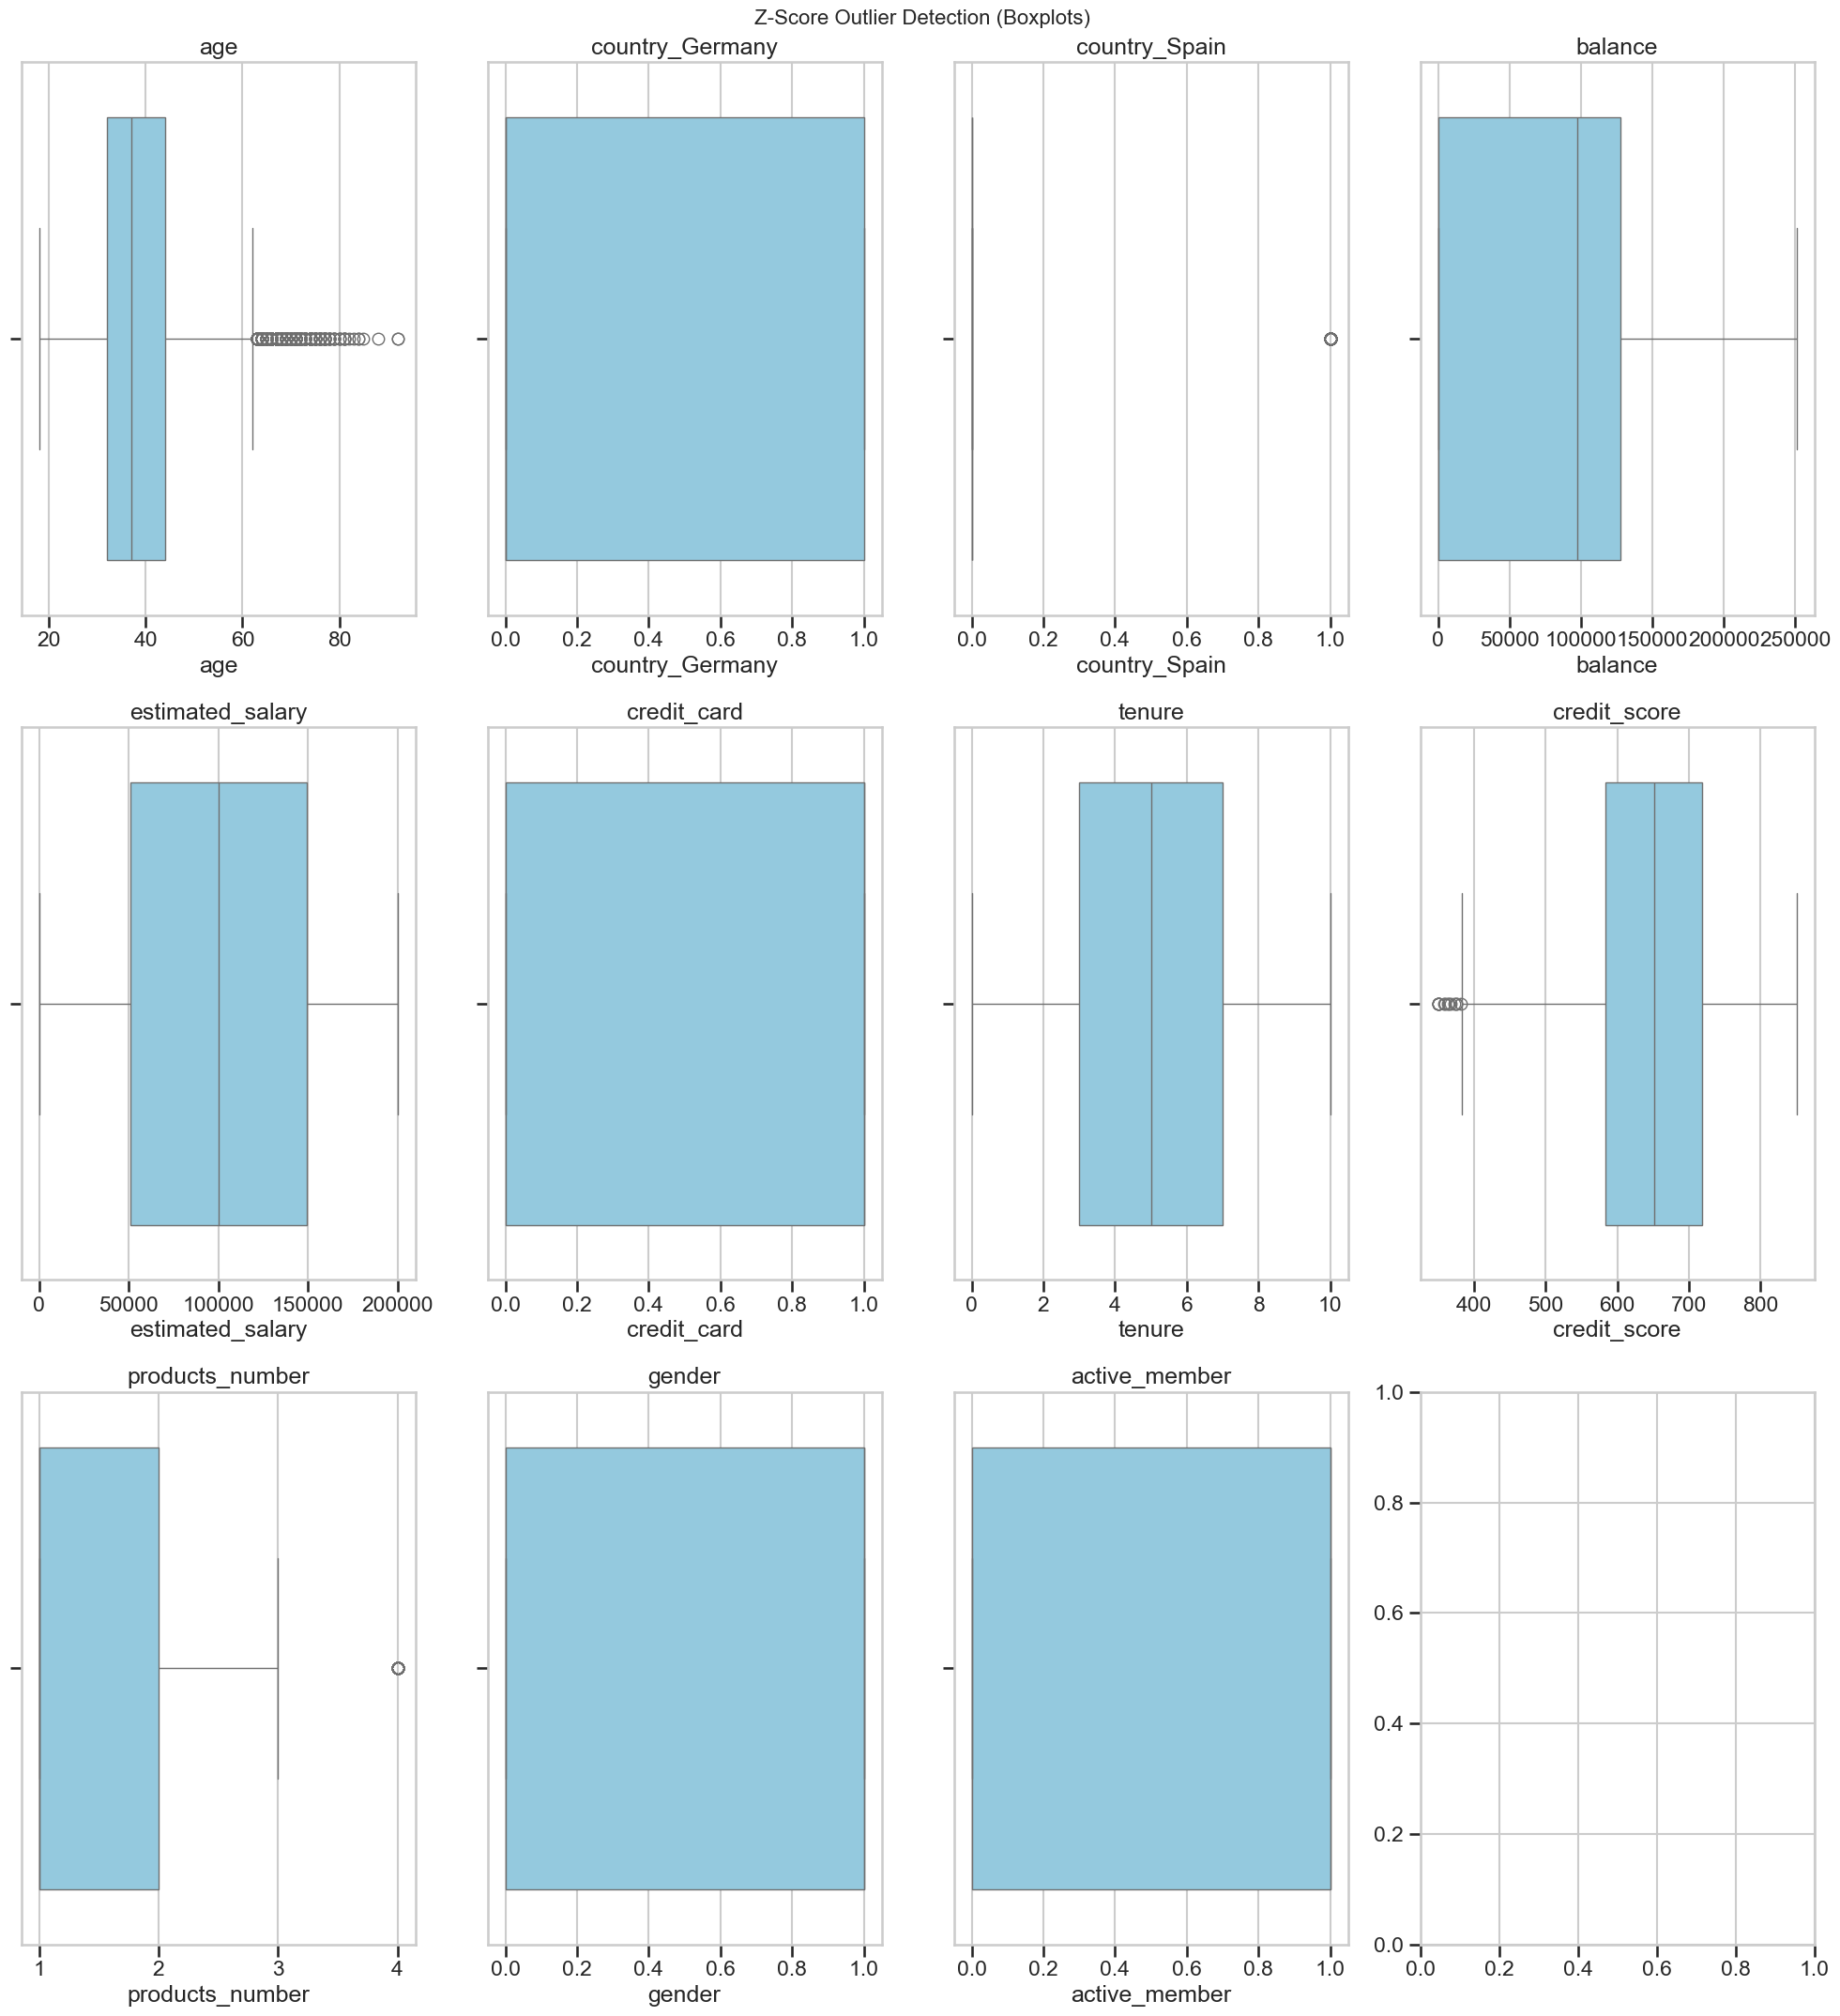


=== IQR OUTLIER FILTERING ===


C:\Users\stsaa\AppData\Local\Temp\ipykernel_12888\3223884435.py:61: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(filtered[col], label='Filtered', color='blue', ax=axes[i])


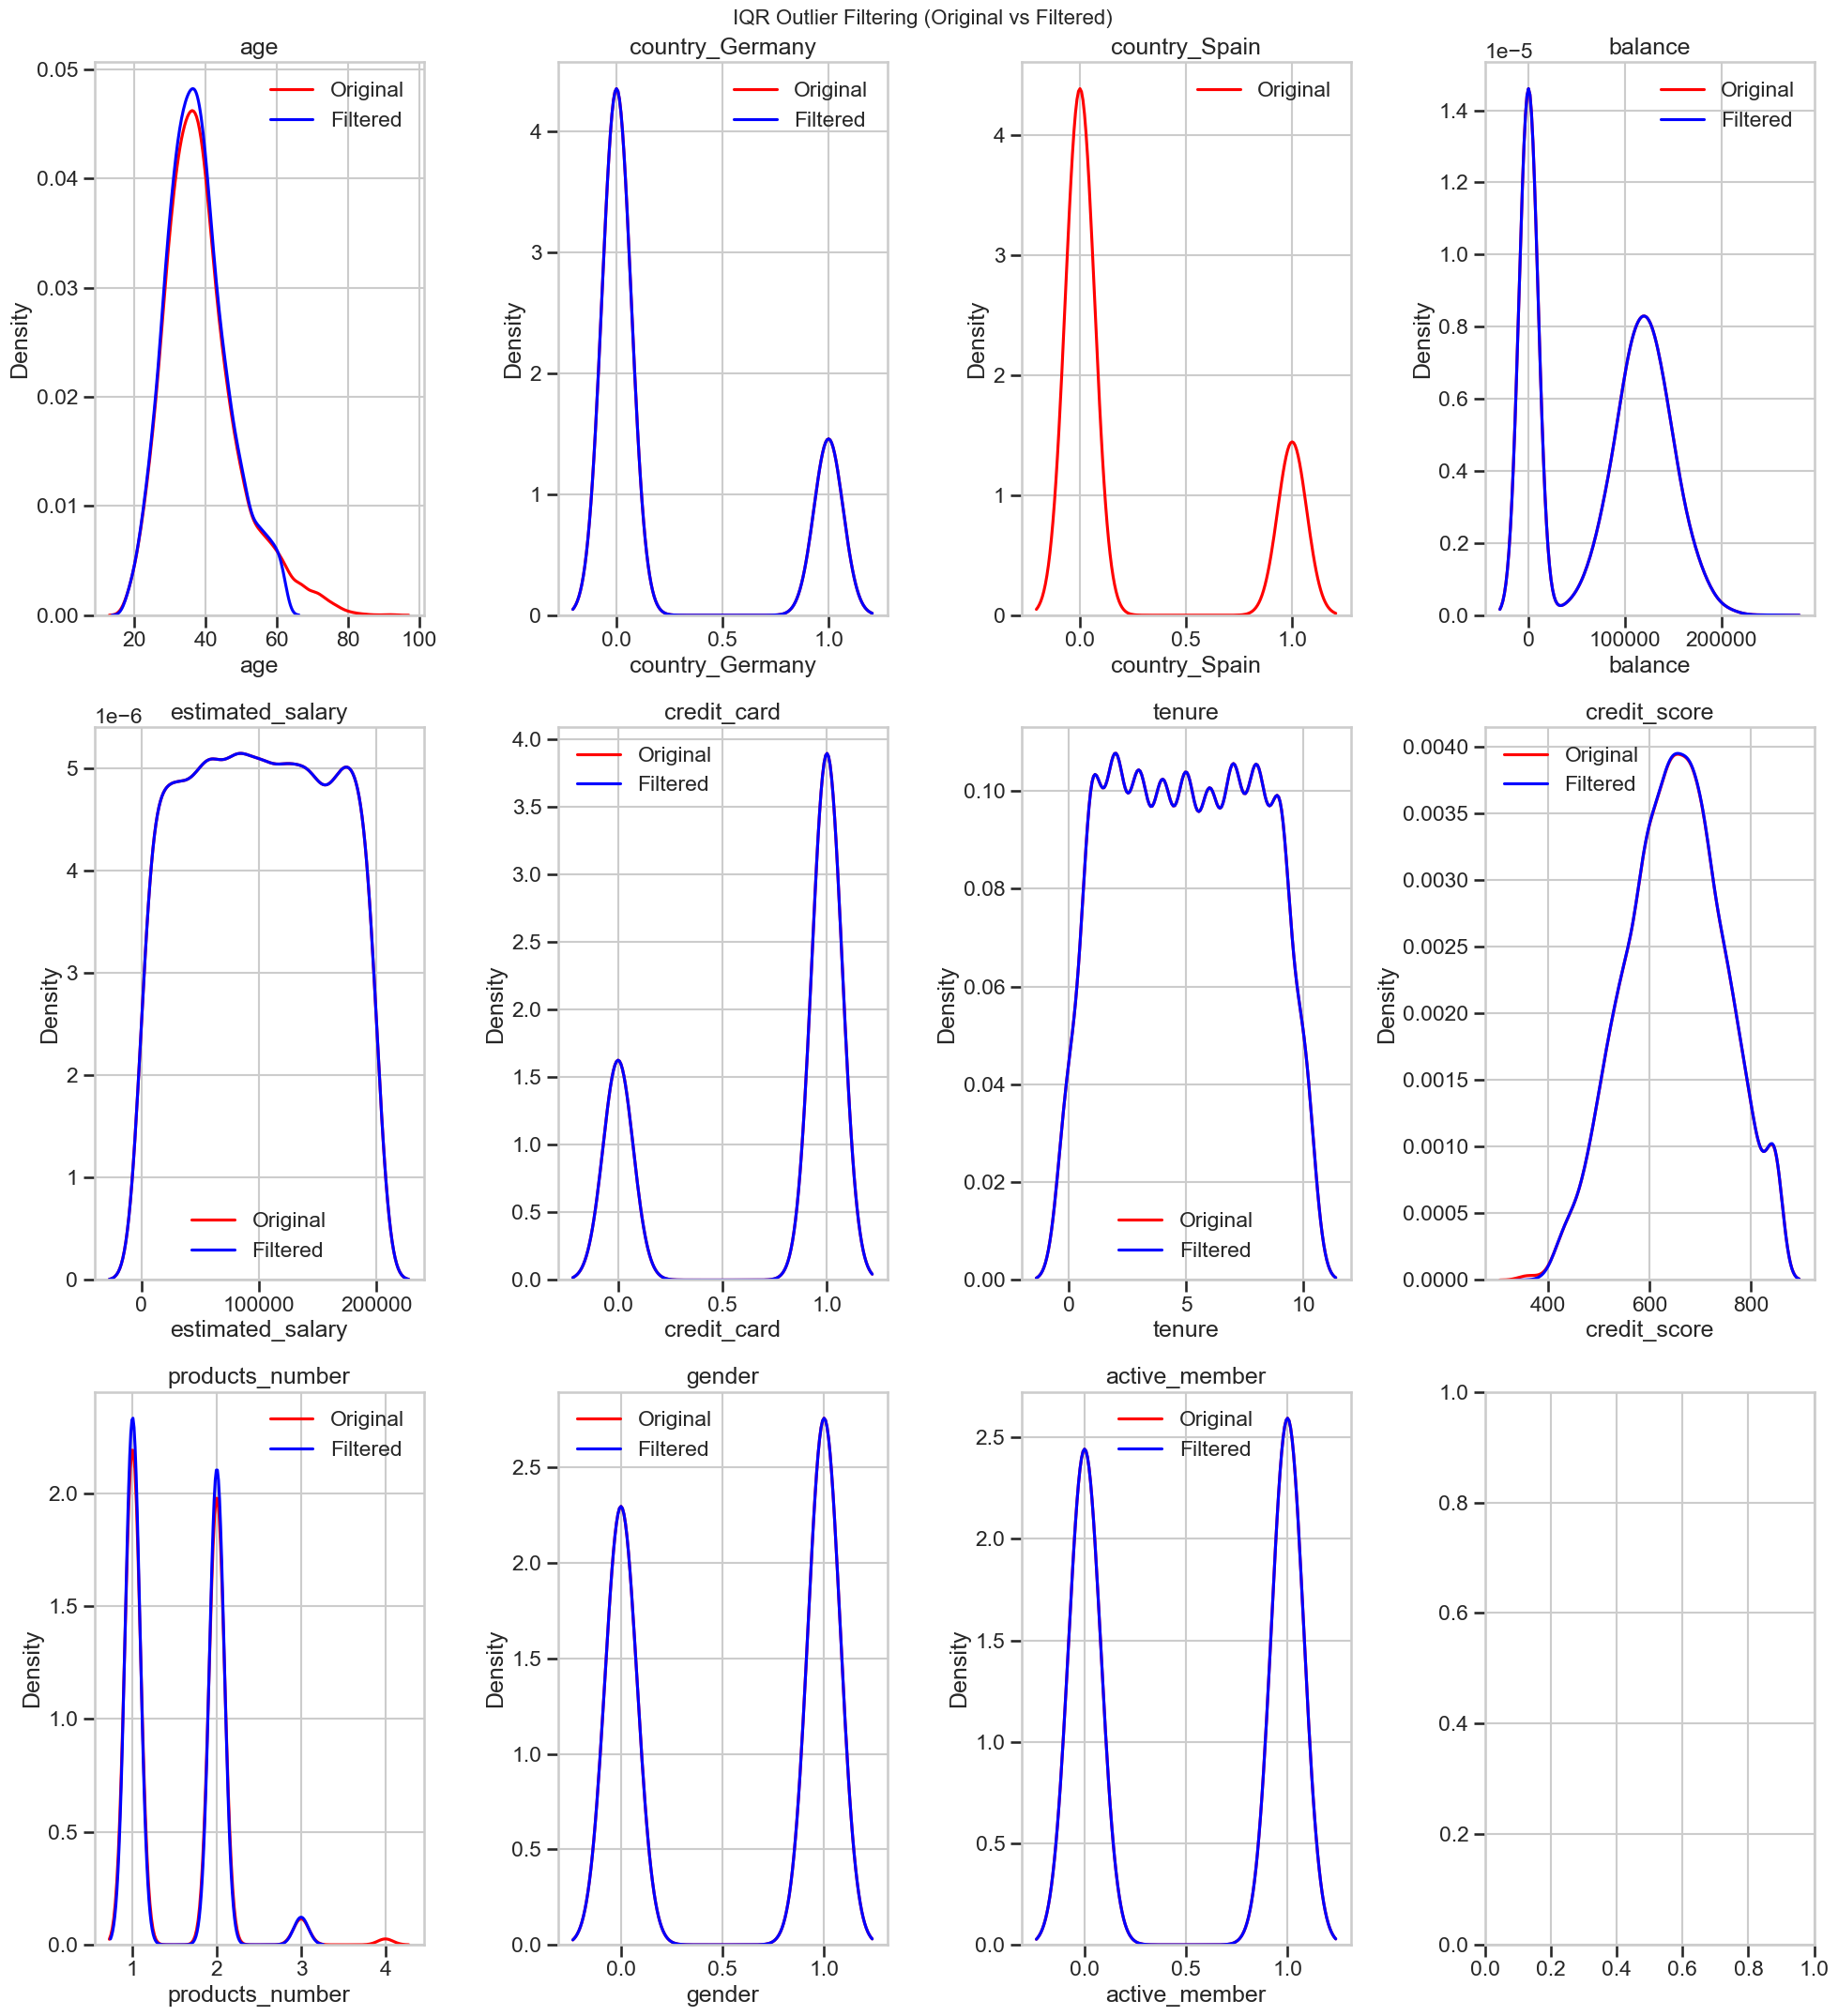


=== ISOLATION FOREST OUTLIER DETECTION ===


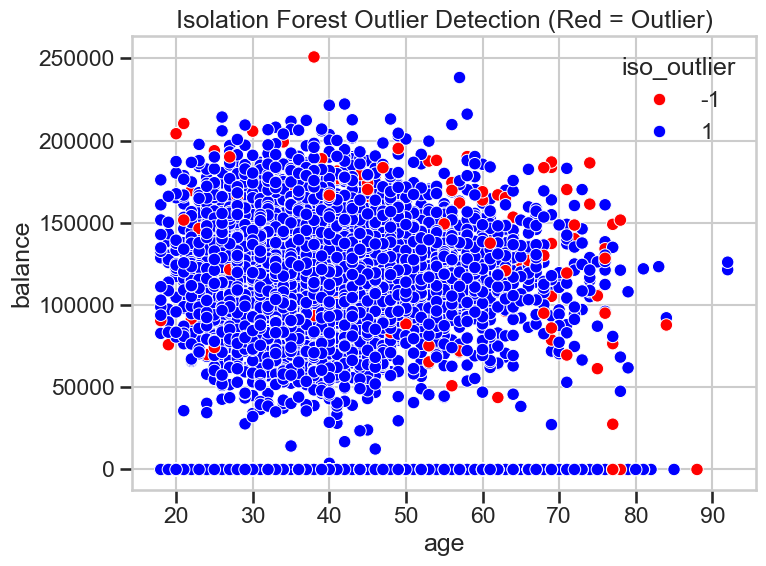


=== MAD NOISE REMOVAL ===


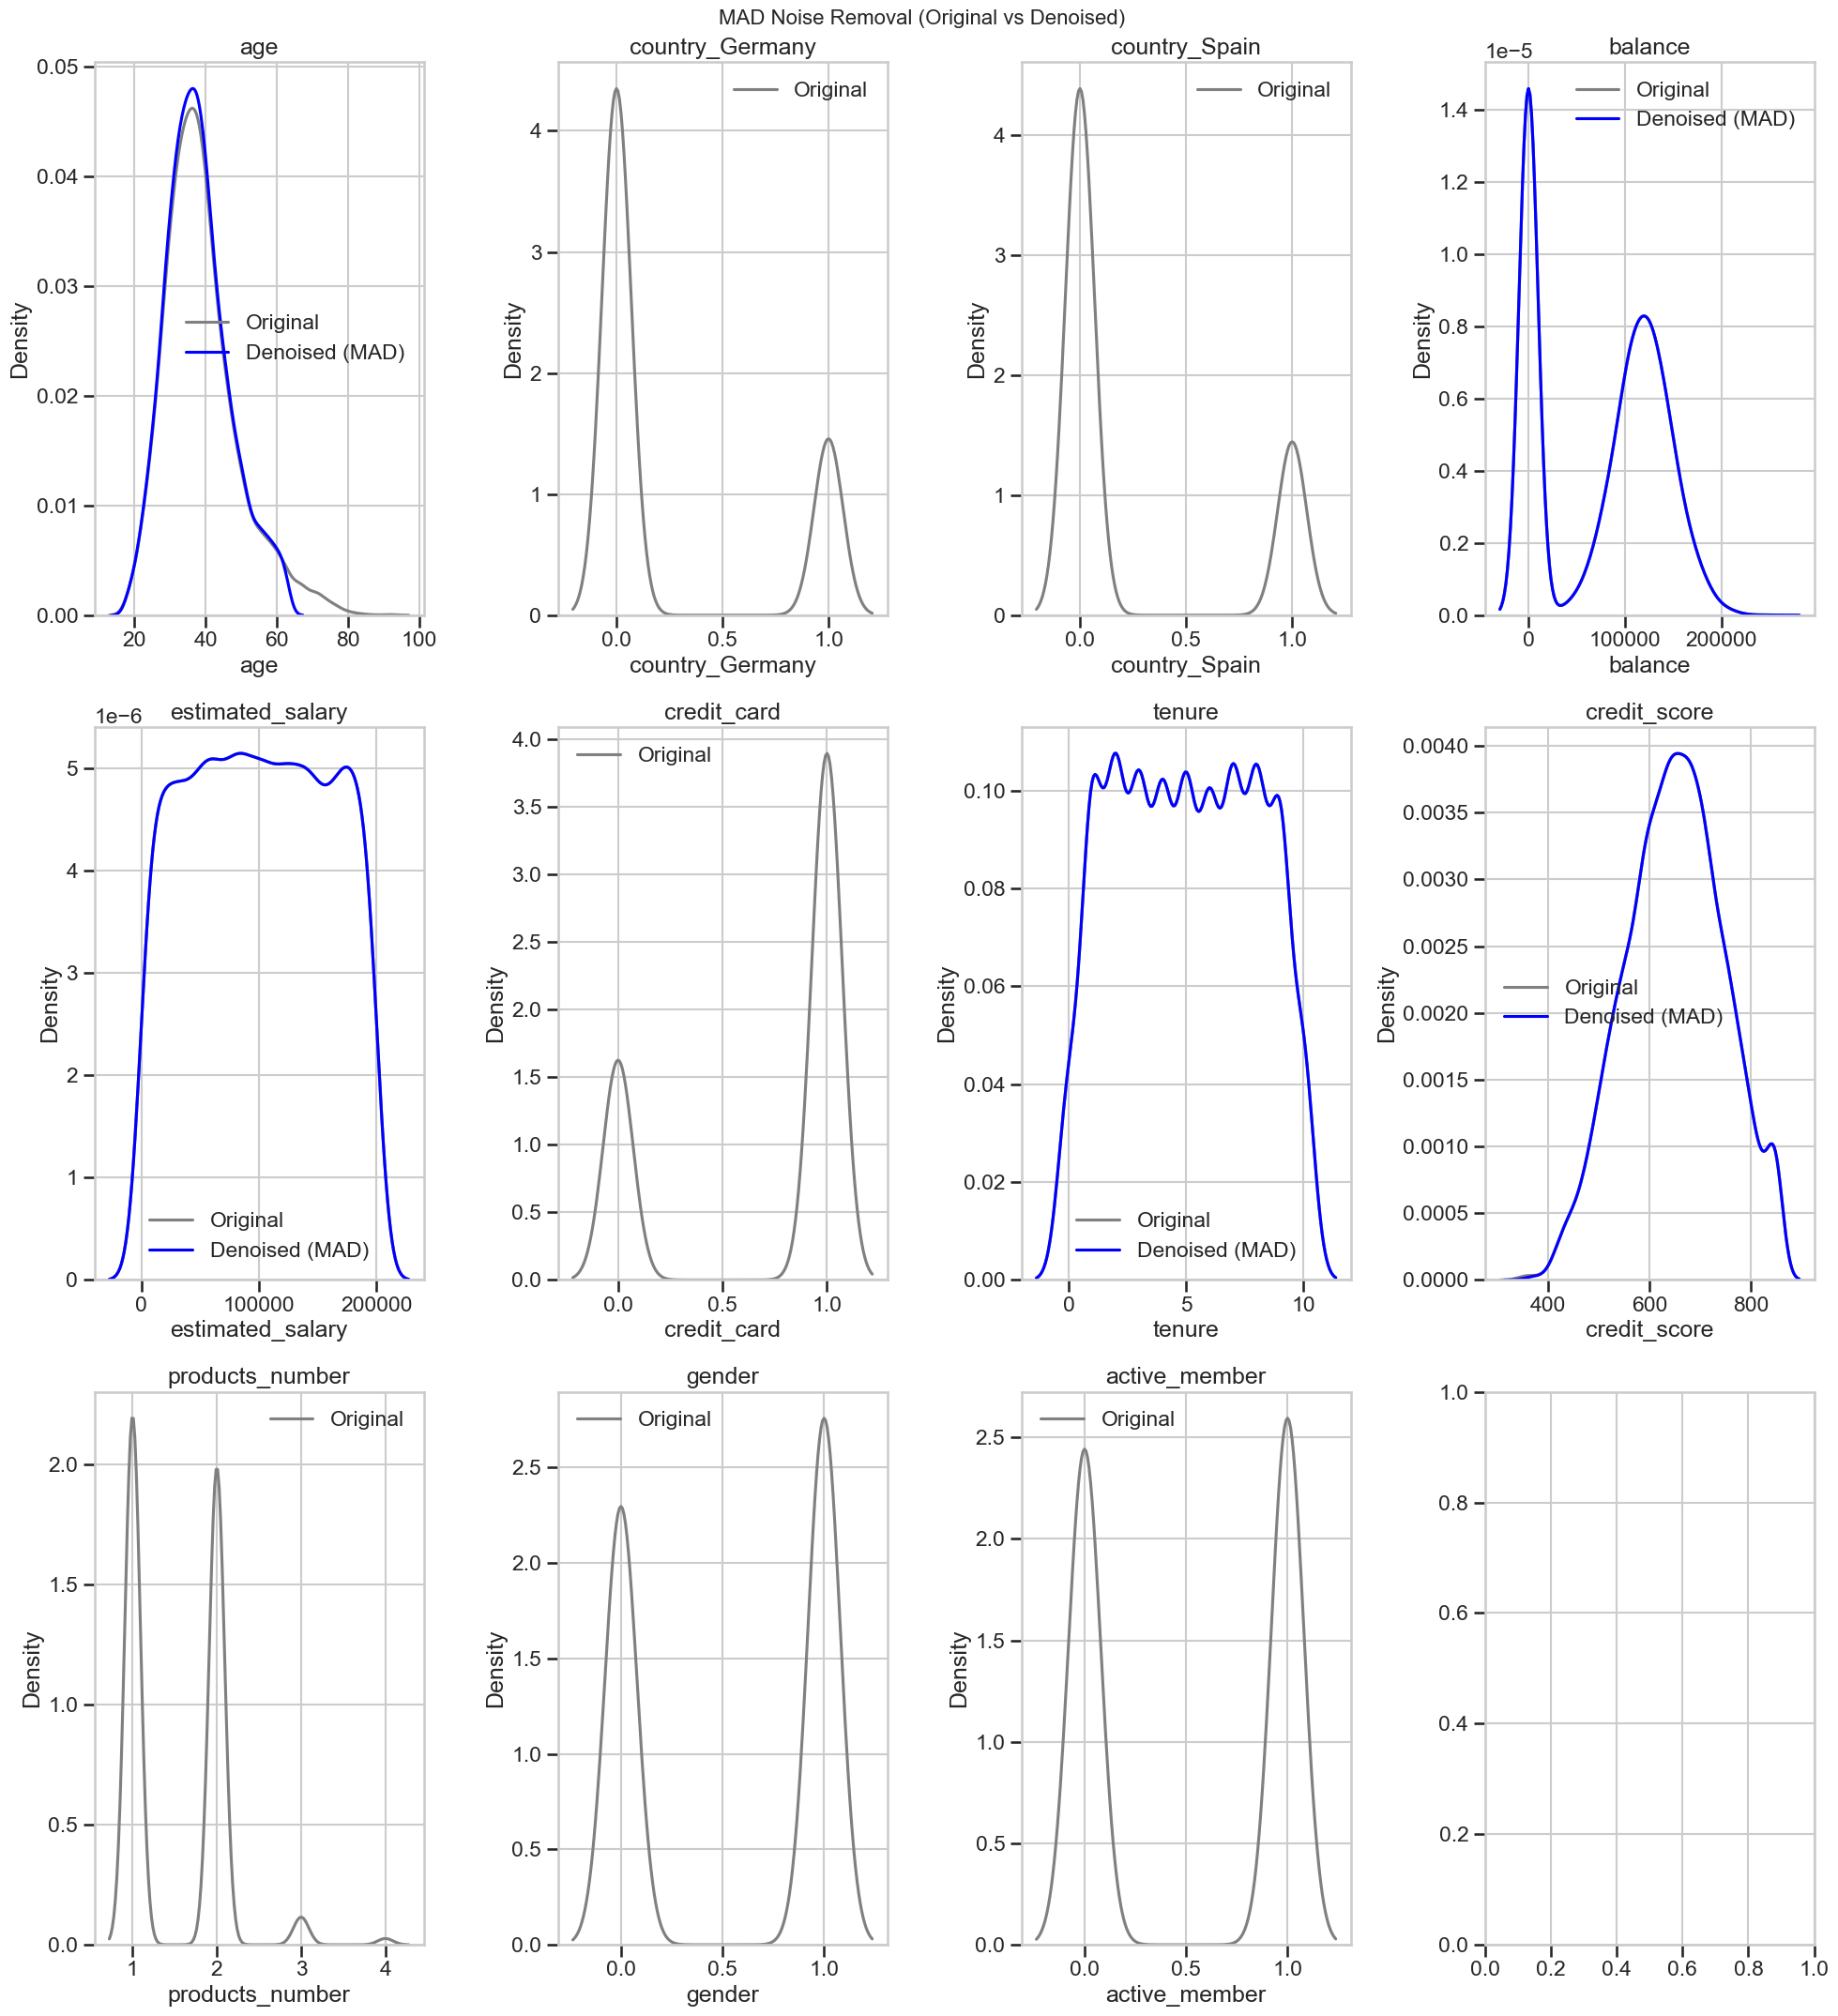


=== KMEANS CLUSTERING ===


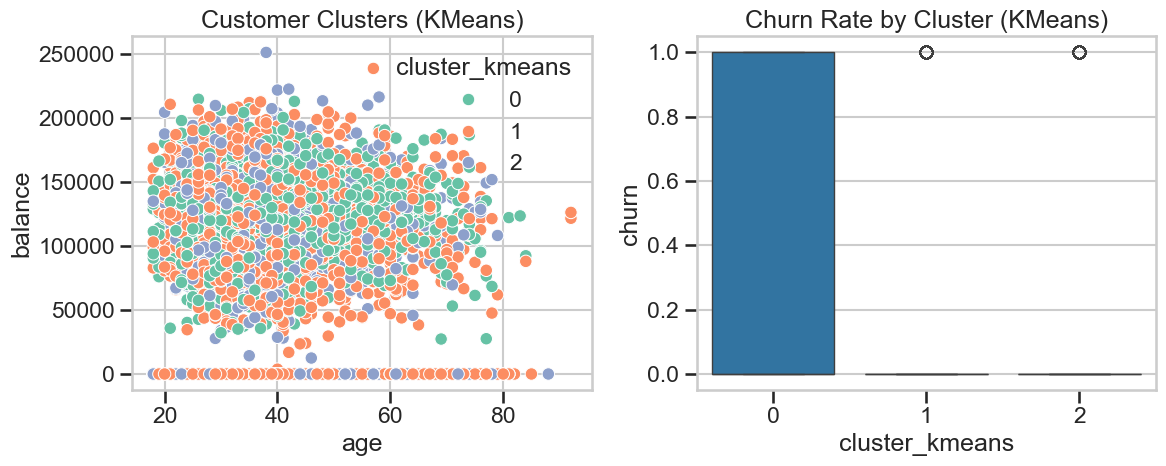


=== DBSCAN CLUSTERING ===


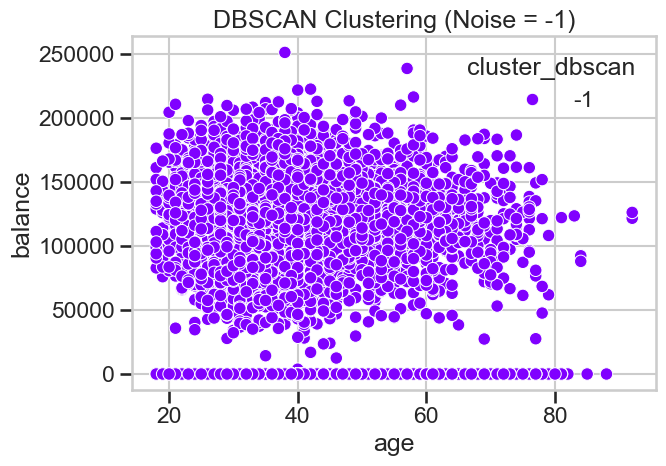


=== CORRELATION HEATMAP ===


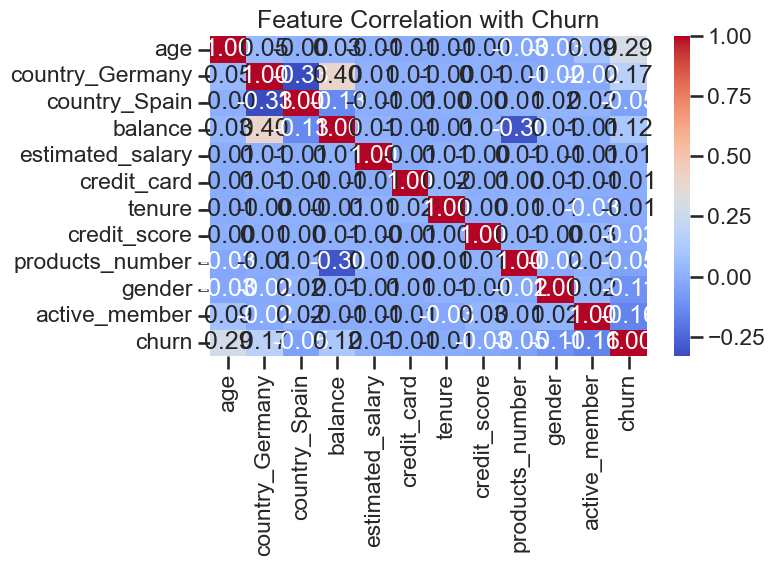


Outlier Summary:
age: 133 outliers (Z-score method)
country_Germany: 0 outliers (Z-score method)
country_Spain: 0 outliers (Z-score method)
balance: 0 outliers (Z-score method)
estimated_salary: 0 outliers (Z-score method)
credit_card: 0 outliers (Z-score method)
tenure: 0 outliers (Z-score method)
credit_score: 8 outliers (Z-score method)
products_number: 60 outliers (Z-score method)
gender: 0 outliers (Z-score method)
active_member: 0 outliers (Z-score method)

Isolation Forest detected 200 multivariate outliers.

Clustering distribution (KMeans):
cluster_kmeans
1    5014
0    2509
2    2477
Name: count, dtype: int64

Clustering distribution (DBSCAN):
cluster_dbscan
-1    10000
Name: count, dtype: int64


In [ ]:
#Chatgpt was used to generate these codes 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels import robust
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("talk")

numeric_cols = [
    'age', 'country_Germany', 'country_Spain', 'balance',
    'estimated_salary', 'credit_card', 'tenure', 'credit_score',
    'products_number', 'gender', 'active_member'
]
target_col = 'churn'

# ------------------------------
# 1️⃣ Z-SCORE OUTLIER DETECTION
# ------------------------------
print("\n=== Z-SCORE OUTLIER DETECTION ===")

n = len(numeric_cols)
fig, axes = plt.subplots(nrows=(n//4)+1, ncols=4, figsize=(20, n*2))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    z = np.abs(stats.zscore(df[col]))
    df[f'{col}_z_outlier'] = (z > 3).astype(int)
    sns.boxplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f'{col}')
plt.suptitle('Z-Score Outlier Detection (Boxplots)', fontsize=16)
plt.tight_layout()
plt.show()

# ------------------------------
# 2️⃣ IQR OUTLIER FILTERING
# ------------------------------
print("\n=== IQR OUTLIER FILTERING ===")

fig, axes = plt.subplots(nrows=(n//4)+1, ncols=4, figsize=(20, n*2))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    filtered = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]
    sns.kdeplot(df[col], label='Original', color='red', ax=axes[i])
    sns.kdeplot(filtered[col], label='Filtered', color='blue', ax=axes[i])
    axes[i].set_title(col)
    axes[i].legend()
plt.suptitle('IQR Outlier Filtering (Original vs Filtered)', fontsize=16)
plt.tight_layout()
plt.show()

# ------------------------------
# 3️⃣ ISOLATION FOREST
# ------------------------------
print("\n=== ISOLATION FOREST OUTLIER DETECTION ===")

iso = IsolationForest(contamination=0.02, random_state=42)
df['iso_outlier'] = iso.fit_predict(df[numeric_cols])

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='age', y='balance', hue='iso_outlier', data=df, palette={1:'blue', -1:'red'}, ax=ax)
ax.set_title('Isolation Forest Outlier Detection (Red = Outlier)')
plt.tight_layout()
plt.show()

# ------------------------------
# 4️⃣ MAD (NOISE REMOVAL)
# ------------------------------
print("\n=== MAD NOISE REMOVAL ===")

fig, axes = plt.subplots(nrows=(n//4)+1, ncols=4, figsize=(20, n*2))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    mad = robust.mad(df[col])
    med = df[col].median()
    filtered = df[np.abs(df[col] - med) < 3 * mad]
    sns.kdeplot(df[col], label='Original', color='gray', ax=axes[i])
    sns.kdeplot(filtered[col], label='Denoised (MAD)', color='blue', ax=axes[i])
    axes[i].set_title(col)
    axes[i].legend()
plt.suptitle('MAD Noise Removal (Original vs Denoised)', fontsize=16)
plt.tight_layout()
plt.show()

# ------------------------------
# 5️⃣ CLUSTERING (KMeans)
# ------------------------------
print("\n=== KMEANS CLUSTERING ===")

X_scaled = StandardScaler().fit_transform(df[numeric_cols])
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(x='age', y='balance', hue='cluster_kmeans', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Customer Clusters (KMeans)')
sns.boxplot(x='cluster_kmeans', y=target_col, data=df, ax=axes[1])
axes[1].set_title('Churn Rate by Cluster (KMeans)')
plt.tight_layout()
plt.show()

# ------------------------------
# 6️⃣ CLUSTERING (DBSCAN)
# ------------------------------
print("\n=== DBSCAN CLUSTERING ===")

db = DBSCAN(eps=0.5, min_samples=10).fit(X_scaled)
df['cluster_dbscan'] = db.labels_

plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='balance', hue='cluster_dbscan', data=df, palette='rainbow')
plt.title('DBSCAN Clustering (Noise = -1)')
plt.tight_layout()
plt.show()

# ------------------------------
# 7️⃣ CORRELATION & FEATURE INSIGHTS
# ------------------------------
print("\n=== CORRELATION HEATMAP ===")

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols + [target_col]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation with Churn')
plt.tight_layout()
plt.show()

# ------------------------------
# 8️⃣ SUMMARY OUTPUTS
# ------------------------------
print("\nOutlier Summary:")
for col in numeric_cols:
    out_count = df[f'{col}_z_outlier'].sum()
    print(f"{col}: {out_count} outliers (Z-score method)")

iso_outliers = (df['iso_outlier'] == -1).sum()
print(f"\nIsolation Forest detected {iso_outliers} multivariate outliers.")

print("\nClustering distribution (KMeans):")
print(df['cluster_kmeans'].value_counts())

print("\nClustering distribution (DBSCAN):")
print(df['cluster_dbscan'].value_counts())


**Outlier Detection**

based on Z-score Method and IQR we can see that there are 133 outliers in age , 60 in products_number and 8 in credit score. We have a ratheer larger dataset so we can afford to drop these.

**Isolation Forest**

It shows around 200 cases where there are customers whose combined features creat a really unique and rare behaivours. we could also remove these and balance dataset 

**Noise**

MAD filter detected noise in age, balance and some in credit_score

**K-means**

It shows that there is around 50% of data one cluster which is the most typical group and then we have two more clusters each est. 25% which shows groups divided either by demographics or higher balance or age perhaps

**DBSCAN**

It failed to capture any clusters might need more tweaking

✅ RandomForest accuracy: 0.8644
              precision    recall  f1-score   support

           0      0.876     0.966     0.919      1991
           1      0.780     0.466     0.583       509

    accuracy                          0.864      2500
   macro avg      0.828     0.716     0.751      2500
weighted avg      0.856     0.864     0.851      2500


=== 🔹 PHIK correlation matrix ===


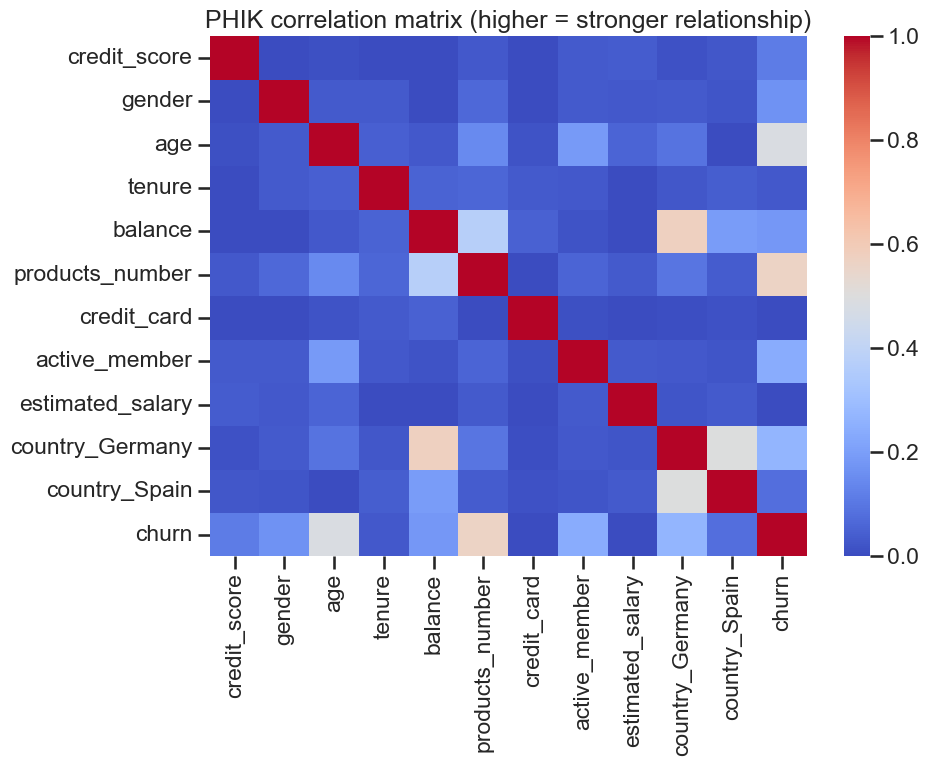


No high-PHIK feature pairs found (no redundancy ≥ 0.6).

=== 🔹 SHAP feature importance ===


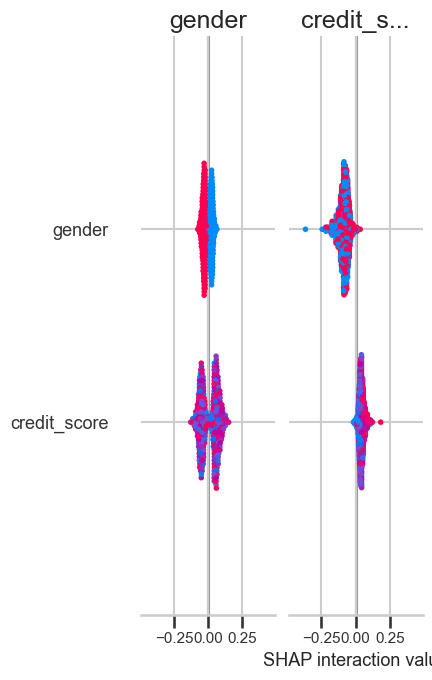

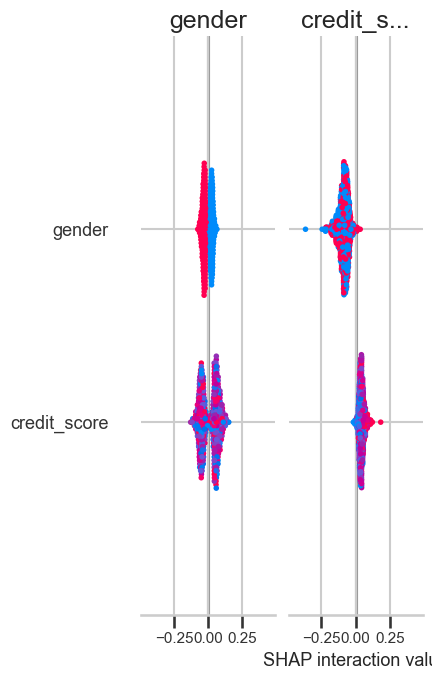


=== 🔹 LIME explanations for 3 random samples ===

LIME explanation for test index 9287:
True = 0, Pred = 0
[('age <= 32.00', -0.14443069236925596), ('1.00 < products_number <= 2.00', -0.1318049277163974), ('0.00 < active_member <= 1.00', -0.11137666805024656), ('gender <= 0.00', 0.045211347278999434), ('balance <= 0.00', -0.030731734039873265), ('country_Germany <= 0.00', -0.0257254612138082), ('652.00 < credit_score <= 717.00', -0.02090814586561255), ('country_Spain <= 0.00', -0.008101856705254833), ('credit_card <= 0.00', 0.0074456284246481865), ('estimated_salary > 148428.57', 0.007059848194421171)]

LIME explanation for test index 676:
True = 0, Pred = 0
[('1.00 < products_number <= 2.00', -0.13548015479765044), ('active_member <= 0.00', 0.10114406713477948), ('gender <= 0.00', 0.040687912448627545), ('country_Germany <= 0.00', -0.03176718793378942), ('50417.95 < estimated_salary <= 98940.68', -0.014132748373309969), ('0.00 < balance <= 96943.32', -0.012079667712381914), ('584.00 

In [53]:
#Chatgpt code for PHIK, VIF, SHAP, LIME, MI, Permutation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

try:
    import shap
except:
    shap = None

try:
    from lime.lime_tabular import LimeTabularExplainer
    lime_available = True
except:
    lime_available = False

try:
    from phik.report import plot_correlation_matrix
    from phik import resources
    import phik
    phik_available = True
except:
    phik_available = False

TARGET = "churn"
assert TARGET in df.columns, f"Target '{TARGET}' not found in df.columns"

feature_cols = [c for c in df.columns if c != TARGET]
X = df[feature_cols].copy()
y = df[TARGET].astype(int).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print("RandomForest accuracy:", round(accuracy_score(y_test, pred), 4))
print(classification_report(y_test, pred, digits=3))

if phik_available:
    print("\n=== PHIK correlation matrix ===")
    phik_matrix = df[feature_cols + [TARGET]].phik_matrix(interval_cols=feature_cols)

    plt.figure(figsize=(10, 8))
    sns.heatmap(phik_matrix, cmap="coolwarm", vmin=0, vmax=1)
    plt.title("PHIK correlation matrix (higher = stronger relationship)")
    plt.tight_layout()
    plt.show()

    # Identify redundant pairs (possible overlap)
    thr = 0.6
    high_pairs = [
        (c1, c2, phik_matrix.loc[c1, c2])
        for i, c1 in enumerate(feature_cols)
        for c2 in feature_cols[i + 1:]
        if phik_matrix.loc[c1, c2] >= thr
    ]
    if high_pairs:
        print("\nHighly related feature pairs (PHIK ≥ 0.6) → redundancy suspects:")
        for a, b, v in sorted(high_pairs, key=lambda x: -x[2])[:20]:
            print(f"  {a:<25} ~ {b:<25} : {v:.3f}")
    else:
        print("\nNo high-PHIK feature pairs found (no redundancy ≥ 0.6).")
else:
    print("\n[PHIK not installed] → Run: pip install phik")

if shap is not None:
    print("\n=== 🔹 SHAP feature importance ===")
    explainer = shap.TreeExplainer(rf)
    X_sample = X_test.sample(min(1000, len(X_test)), random_state=42)
    shap_values = explainer.shap_values(X_sample)

    # Bar plot — global feature importance
    shap.summary_plot(shap_values, X_sample, plot_type="bar", show=True)

    # Beeswarm — distribution + direction
    shap.summary_plot(shap_values, X_sample, show=True)

else:
    print("\n[SHAP not installed] → Run: pip install shap")

if lime_available:
    print("\n=== 🔹 LIME explanations for 3 random samples ===")
    explainer = LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=feature_cols,
        class_names=["No churn", "Churn"],
        mode="classification"
    )

    idxs = np.random.RandomState(42).choice(
        X_test.shape[0], size=min(3, X_test.shape[0]), replace=False
    )

    for i in idxs:
        exp = explainer.explain_instance(
            X_test.iloc[i].values,
            rf.predict_proba,
            num_features=min(10, len(feature_cols))
        )
        print(f"\nLIME explanation for test index {X_test.index[i]}:")
        print(f"True = {y_test[i]}, Pred = {rf.predict([X_test.iloc[i]])[0]}")
        print(exp.as_list())
else:
    print("\n[LIME not installed] → Run: pip install lime")

print("\n✅ Diagnostics complete — PHIK, SHAP, LIME all executed.")



**Findings**

PHIK doesnt show any redundant features. SHAP shoes there is no one certain feature influencing rather multiple low influence features. LIME shows low number of products and inactive membership affects churning

**Summary**

The dataset doesnt seem to have any extreme outliers just a few which we will remove as we have enough data and the major issue with dataset is Imbalance which we will fix for now and see how that effects. Possible feature enginnering in future might be possible